# Indicateur

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
input_veh = os.getcwd() + "/OUTPUTS_7h_9h_1depot/veh.csv"
veh = pd.read_csv(input_veh, delimiter = ";")
veh

,TIME,ID,TYPE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,14,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1132382.0
1,07:00:00.00,13,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1131971.0
2,07:00:00.00,12,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
3,07:00:00.00,11,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,924182.0
4,07:00:00.00,10,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1167114.0
...,...,...,...,...,...,...,...,...,...
131639,09:39:00.00,11366,Car,m46097566 m45999429,636713.741 5794072.569,11.498,STOP,27394.514,NaN
131640,09:39:00.00,11475,Car,m46554659 m46553321,627671.981 5808943.170,11.498,STOP,26382.140,NaN
131641,09:39:00.00,11558,Car,m4620948065 m46551410,627943.705 5808845.266,11.498,SERVING,26023.140,1116224.0
131642,09:39:00.00,11690,Car,m3649782943 m3649776206,636107.624 5808759.607,11.498,STOP,23129.987,NaN


In [3]:
input_path = os.getcwd() + "/OUTPUTS_7h_9h_1depot/path.csv"
path = pd.read_csv(input_path, delimiter = ";")
path

,ID,COST,PATH,LENGTH,SERVICE
0,1111241,1092.478687,ORIGIN_108 m46193581 m1650696925 m3741600623 m...,6062.960154,PersonalVehicle
1,1168071,1936.686911,ORIGIN_122 m75538939 m46336665 m76475469 m4633...,16391.371423,PersonalVehicle
2,1040303,147.834270,ORIGIN_120 m46386982 DESTINATION_120,209.924663,PersonalVehicle
3,1135295,2054.267485,ORIGIN_92 m46020860 m46037691 m292823256 m5903...,13177.008358,PersonalVehicle
4,1034483,1331.438948,ORIGIN_120 m46386982 m4477854926 m2311116268 m...,14105.391710,PersonalVehicle
...,...,...,...,...,...
12085,1021268,410.613476,ORIGIN_119 m46398921 DESTINATION_119,583.071136,PersonalVehicle
12086,1089329,23.837952,ORIGIN_106 m46186201 DESTINATION_106,33.849892,PersonalVehicle
12087,1065005,23.837952,ORIGIN_106 m46186201 DESTINATION_106,33.849892,PersonalVehicle
12088,1084683,23.837952,ORIGIN_106 m46186201 DESTINATION_106,33.849892,PersonalVehicle


# By steps

In [2]:
input_veh = os.getcwd() + "/OUTPUTS_test_every_10mn/veh.csv"
veh = pd.read_csv(input_veh, delimiter = ";")
veh

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:08:00.00,5,Car,PersonalVehicle,m46193581 m1650696925,NaN,13.8,SERVING,0.000,1111241.0
1,07:09:00.00,5,Car,PersonalVehicle,m1650696925 m3741600623,634791.099 5799661.489,11.5,SERVING,689.980,1111241.0
2,07:10:00.00,5,Car,PersonalVehicle,m46217301 m46209721,634663.631 5799918.573,11.5,SERVING,1379.960,1111241.0
3,07:11:00.00,5,Car,PersonalVehicle,m3871583562 m4340380309,634379.834 5799313.766,11.5,SERVING,2069.940,1111241.0
4,07:12:00.00,5,Car,PersonalVehicle,m4340287607 m4340287472,633849.143 5799150.185,11.5,SERVING,2759.920,1111241.0
...,...,...,...,...,...,...,...,...,...,...
192,09:33:00.00,18,Car,PersonalVehicle,m3012264014 m46463438,627949.280 5805909.113,11.5,SERVING,6209.820,943104.0
193,09:34:00.00,18,Car,PersonalVehicle,m46446656 m46439130,628018.780 5805401.184,11.5,SERVING,6899.800,943104.0
194,09:35:00.00,18,Car,PersonalVehicle,m434441244 m2020614213,627802.373 5804775.540,11.5,SERVING,7589.780,943104.0
195,09:36:00.00,18,Car,PersonalVehicle,m46393384 m297095279,627610.879 5804130.570,11.5,SERVING,8279.760,943104.0


In [4]:
def track_a_vehicle(df, id):
    ID = df['ID'].tolist()
    indices = [i for i, x in enumerate(ID) if x == id]
    dataframe = df.loc[indices]
    return dataframe

In [42]:
df = track_a_vehicle(veh, 5)
df

,TIME,ID,TYPE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
9,07:00:00.00,5,Car,NaN,NaN,13.8,SERVING,0.0,1126744.0


In [5]:
# return a dataframe containing only uber
def only_uber(df):
    service = df.SERVICE.tolist()
    [i for i,x in enumerate(service) if x == 'UBER']
    dataframe = df.loc[indices]
    return dataframe

# Dynamic

In [6]:
table = veh.groupby(['TIME', 'STATE']).ID.count().unstack().fillna(0)
table

STATE,SERVING,STOP
TIME,,
07:00:00.00,10.0,0.0
07:01:00.00,51.0,0.0
07:02:00.00,87.0,0.0
07:03:00.00,138.0,0.0
07:04:00.00,198.0,0.0
...,...,...
09:36:00.00,6.0,0.0
09:37:00.00,4.0,2.0
09:38:00.00,4.0,0.0


<AxesSubplot:xlabel='TIME'>

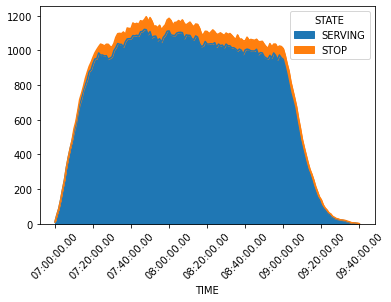

In [7]:
ax = table.plot.area()
ax.tick_params(axis='x', labelrotation = 45)
ax

In [8]:
def computeDynamic(df):
    # veh = only_uber(df)
    table = veh.groupby(['TIME', 'STATE']).ID.count().unstack().fillna(0)
    ax = table.plot.area()
    ax.tick_params(axis='x', labelrotation = 45)

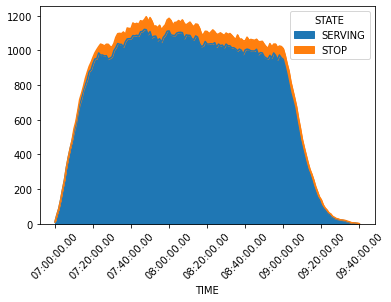

In [9]:
computeDynamic(veh)

# Static

In [10]:
veh

,TIME,ID,TYPE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,14,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1132382.0
1,07:00:00.00,13,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1131971.0
2,07:00:00.00,12,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
3,07:00:00.00,11,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,924182.0
4,07:00:00.00,10,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1167114.0
...,...,...,...,...,...,...,...,...,...
131639,09:39:00.00,11366,Car,m46097566 m45999429,636713.741 5794072.569,11.498,STOP,27394.514,NaN
131640,09:39:00.00,11475,Car,m46554659 m46553321,627671.981 5808943.170,11.498,STOP,26382.140,NaN
131641,09:39:00.00,11558,Car,m4620948065 m46551410,627943.705 5808845.266,11.498,SERVING,26023.140,1116224.0
131642,09:39:00.00,11690,Car,m3649782943 m3649776206,636107.624 5808759.607,11.498,STOP,23129.987,NaN


In [34]:
veh_test = veh.replace(to_replace=18, value=25)
veh_test

,TIME,ID,TYPE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,14,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1132382.0
1,07:00:00.00,13,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1131971.0
2,07:00:00.00,12,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
3,07:00:00.00,11,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,924182.0
4,07:00:00.00,10,Car,m46186201 m46184457,NaN,13.800,SERVING,0.000,1167114.0
...,...,...,...,...,...,...,...,...,...
131639,09:39:00.00,11366,Car,m46097566 m45999429,636713.741 5794072.569,11.498,STOP,27394.514,NaN
131640,09:39:00.00,11475,Car,m46554659 m46553321,627671.981 5808943.170,11.498,STOP,26382.140,NaN
131641,09:39:00.00,11558,Car,m4620948065 m46551410,627943.705 5808845.266,11.498,SERVING,26023.140,1116224.0
131642,09:39:00.00,11690,Car,m3649782943 m3649776206,636107.624 5808759.607,11.498,STOP,23129.987,NaN


In [12]:
def nbTravels(index, df):
    State = df.STATE.tolist()
    i_start = [index[0]]
    i_end = []
    step = []
    cpt = 0
    t = 0
    for t in range(len(index) - 1):
        if (State[index[t]] == 'STOP') & (t != len(index) - 1): # if not the last stop
            i_start.append(index[t+1])
            i_end.append(index[t])
            cpt+=1
            t = t
    if (State[index[-1]] == 'STOP'): # if the last stop 
        i_end.append(index[-1])
        cpt+=1
        
    return (cpt, i_start, i_end) 

In [13]:
index = [t for t,x in enumerate(veh_test.ID.tolist()) if (x == 5)]
nb, s, e = nbTravels(index, veh_test)

In [14]:
(s,e)

([9], [2370])

In [15]:
index

[9, 57, 71, 158, 296, 494, 747, 1071, 1454, 1889, 2370]

In [16]:
def computeStatic(df):
    # df = only_uber(df)
    time = []
    dist = []
    nbPass = []
    ids = list(set(df.ID.tolist()))
    ID = df.ID.tolist()
    State = df.STATE.tolist()
    Distance = df.DISTANCE.tolist()
    Passenger = df.PASSENGERS.tolist()
    #cleanNan = lambda l : [x for x in l if str(x) != 'nan']  # clean nan 
    Time = [float(i[:2])*3600 + float(i[3:5])*60 for i in df.TIME.tolist()]  # turn to second
    for i in ids:
        index = [m for m,x in enumerate(ID) if (x == i)]
        nb, i_start, i_end = nbTravels(index, df)
        if nb != 0:
            travel_time = sum([Time[i_end[i]] - Time[i_start[i]] for i in range(len(i_start))])
            time.append(travel_time)
            dist.append(sum([Distance[i_end[i]] for i in range(len(i_end))]))
            nbPass.append(nb)
        else:  # no passengers, no travels
            time.append(0)
            dist.append(0)
            nbPass.append(0)
    return (ids, time, dist, nbPass)

In [17]:
def buildDataframe_global(time, dist, nbPass):
    data = [['TIME', sum(time), mean(time), min(time), max(time), np.std(time)], 
            ['DISTANCE', sum(dist), mean(dist), min(dist), max(dist), np.std(dist)],
             ['PASSENGERS', sum(nbPass), mean(nbPass), min(nbPass), max(nbPass), np.std(nbPass)]]
    df = pd.DataFrame(data, columns=['PARAMETRE', 'Total', 'Mean', 'Min', 'Max', 'Sd'])
    return df                                                                                                                                                                                                        

In [35]:
ids, time, dist, nbPass = computeStatic(veh_test)

In [19]:
def buildDataframe(ids, time, dist, nbPass):
    d = {'ID': ids, 'TIME': time, 'DISTANCE': dist, 'PASSENGERS': nbPass}
    df = pd.DataFrame(data = d)
    return df

In [41]:
df1 = buildDataframe(ids, time, dist, nbPass)
df1.head(25)

,ID,TIME,DISTANCE,PASSENGERS
0,5,0.0,0.000,0
1,6,900.0,9747.115,1
2,7,0.0,0.000,0
3,8,720.0,7636.875,1
4,9,780.0,8353.012,1
5,10,780.0,8353.012,1
6,11,540.0,6068.019,1
7,12,600.0,6255.867,1
8,13,1320.0,14295.965,1
9,14,720.0,7636.875,1


In [37]:
df2 = buildDataframe_global(time, dist, nbPass)
df2

,PARAMETRE,Total,Mean,Min,Max,Sd
0,TIME,7.195260e+06,614.296935,0,2700.000,531.276750
1,DISTANCE,7.781386e+07,6643.376137,0,29753.074,5827.111790
2,PASSENGERS,7.966000e+03,0.680099,0,2.000,0.466621


In [24]:
len(nbPass) == len(set(veh_test.ID.tolist()))

True